In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("./scores.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,model,fitness,episode
0,./models\3cabc502v1_20241121-171431_0.pth,-316.103336,0
1,./models\3cabc502v1_20241121-171444_0.pth,-305.418096,0
2,./models\3cabc502v1_20241121-171444_100.pth,-131.415730,100
3,./models\3cabc502v1_20241121-171444_200.pth,-234.015134,200
4,./models\3cabc502v1_20241121-171444_300.pth,-118.527522,300
...,...,...,...
2280,./models\v1_20241204-191930_7e41d077_69900.pth,138.746433,69900
2281,./models\v1_20241204-191930_7e41d077_70000.pth,136.908417,70000
2282,./models\v1_20241204-191930_7e41d077_70100.pth,131.633977,70100
2283,./models\v1_20241204-191930_7e41d077_70200.pth,139.552931,70200


In [10]:
data['timestamp'] = data['model'].map(lambda x: x.split('_')[1])
data

,model,fitness,episode,timestamp
0,./models\3cabc502v1_20241121-171431_0.pth,-316.103336,0,20241121-171431
1,./models\3cabc502v1_20241121-171444_0.pth,-305.418096,0,20241121-171444
2,./models\3cabc502v1_20241121-171444_100.pth,-131.415730,100,20241121-171444
3,./models\3cabc502v1_20241121-171444_200.pth,-234.015134,200,20241121-171444
4,./models\3cabc502v1_20241121-171444_300.pth,-118.527522,300,20241121-171444
...,...,...,...,...
2280,./models\v1_20241204-191930_7e41d077_69900.pth,138.746433,69900,20241204-191930
2281,./models\v1_20241204-191930_7e41d077_70000.pth,136.908417,70000,20241204-191930
2282,./models\v1_20241204-191930_7e41d077_70100.pth,131.633977,70100,20241204-191930
2283,./models\v1_20241204-191930_7e41d077_70200.pth,139.552931,70200,20241204-191930


In [11]:
plots = data.groupby('timestamp').apply(lambda x: x)
plots

C:\Users\Maciej\AppData\Local\Temp\ipykernel_19388\1987741560.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plots = data.groupby('timestamp').apply(lambda x: x)


model  \
timestamp                                                              
20241120-220235 153        ./models\94f62293v1_20241120-220235_0.pth   
20241120-220554 154        ./models\94f62293v1_20241120-220554_0.pth   
20241120-220607 155        ./models\94f62293v1_20241120-220607_0.pth   
                156      ./models\94f62293v1_20241120-220607_100.pth   
                157      ./models\94f62293v1_20241120-220607_200.pth   
...                                                              ...   
20241204-191930 2280  ./models\v1_20241204-191930_7e41d077_69900.pth   
                2281  ./models\v1_20241204-191930_7e41d077_70000.pth   
                2282  ./models\v1_20241204-191930_7e41d077_70100.pth   
                2283  ./models\v1_20241204-191930_7e41d077_70200.pth   
                2284  ./models\v1_20241204-191930_7e41d077_70300.pth   

                         fitness  episode        timestamp  
timestamp                                                   
20241120-220235 153  -130.159217        0  20241120-220235  
20241120-220554 154  -455.063430        0  20241120-220554  
20241120-220607 155  -157.756018        0  20241120-220607  
                156  -562.229158      100  20241120-220607  
                157  -391.874226      200  20241120-220607  
...                          ...      ...              ...  
20241204-191930 2280  138.746433    69900  20241204-191930  
                2281  136.908417    70000  20241204-191930  
                2282  131.633977    70100  20241204-191930  
                2283  139.552931    70200  20241204-191930  
                2284  124.408952    70300  20241204-191930  

[2285 rows x 4 columns]

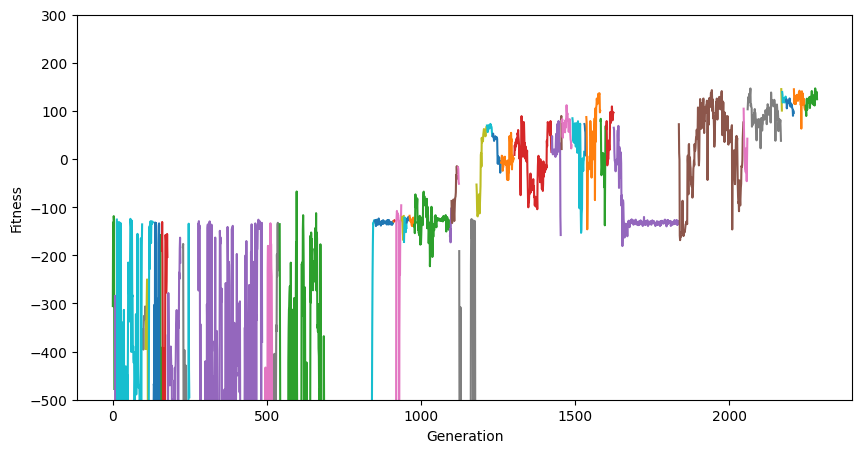

In [12]:
plt.figure(figsize=(10, 5))
for model in plots['timestamp'].unique():
    values = plots[plots['timestamp'] == model]
    x = values.index.get_level_values(1)
    y = values['fitness']
    
    
    plt.plot(x, y, label=model)

plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.ylim(-500, 300)
plt.show()

In [13]:
data.sort_values(by='fitness', ascending=False).head(10)

,model,fitness,episode,timestamp
2278,./models\v1_20241204-191930_7e41d077_69700.pth,146.907549,69700,20241204-191930
2068,./models\v1_20241128-225032_6fe0f1e9_63200.pth,146.785996,63200,20241128-225032
2168,./models\v1_20241129-193459_49e4846d_63000.pth,145.403693,63000,20241129-193459
2209,./models\v1_20241204-141922_48ab8161_62900.pth,145.084507,62900,20241204-141922
1943,./models\v1_20241128-085415_6fe0f1e9_58800.pth,143.286156,58800,20241128-085415
2279,./models\v1_20241204-191930_7e41d077_69800.pth,142.806141,69800,20241204-191930
2227,./models\v1_20241204-141922_48ab8161_64700.pth,142.042299,64700,20241204-141922
2267,./models\v1_20241204-191930_7e41d077_68600.pth,141.430261,68600,20241204-191930
1975,./models\v1_20241128-085415_6fe0f1e9_62000.pth,141.270737,62000,20241128-085415
2235,./models\v1_20241204-141922_48ab8161_65500.pth,140.861026,65500,20241204-141922
